# Common Envelope Evolution in AGN Stars 

In [1]:
%matplotlib inline
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import cm
import mkipp
#import mesa_data
import numpy as np
import mesa_reader as mr
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
from Constants import Constants
c=Constants() 

Constants defined...


In [2]:
####################################################
# Plt Options from Perna, Lazzati & Cantiello 2017 #
####################################################
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 20 
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['legend.borderpad'] = 0.5
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
####################################################

BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)

COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

logteff=r'$\log_{10}\, T_{\rm eff}$/K'
logell=r'$\log_{10}\, L$/L$_\odot$'
logteff=r'$\log_{10}\, T_{\rm eff}\,/\,$K'
logell=r'$\log_{10}\, L\, / \, {\rm L}_\odot$'
rho_title = r'$\rho_{\rm AGN}$ [g cm$^{-3}$]'
logtstar=r'$\log_{10}\, T_{\star}\,/\,$K'
logtstar=r'$\log_{10}\, T_{\ast}\,/\,$K'


In [3]:
IMMORTAL = '../agnstars/adam_prototype_14547/grids/cs10/RHO_3d-17/LOGS/profile20.data'

In [4]:
p = mr.MesaData(IMMORTAL)

# Accretion stream properties according to Cantiello et al. 2021
 T $\propto$ r$^{-3/8}$ and $\rho \propto r^{-3/2}$
 
 The Bondi radius is 2GM/cs_agn^2. We want to start at the bondi radius with cs_agn and rho_agn and connect down to the surface of the agn star using these 

In [5]:
cs_agn = 1e6
rho_agn = 3e-17
M = p.mass[0]
r_b = 2*c.G* M*c.msun / cs_agn**2.0

In [6]:
print(r_b/c.rsun)
print(M)

2952065.1791086867
773.342886953345


In [7]:
r_star = 10**p.logR[0]*c.rsun

In [8]:
# Constants (assuming r_star, r_b, and c.rsun are already defined)
n = 1000
rho_agn = 3e-17  # Target density at r_b
#T_agn = 3000 
T_star = 10**p.logT[0]

print(T_star)

# Calculate r_stream
r_stream = np.linspace(r_star, r_b, n)
r_stream = r_stream / c.rsun  # Normalize by solar radius

# Initial rho_stream calculation
rho_stream = r_stream**(-1.5)
T_stream = r_stream**(-3.0/8.0)

# Determine the scaling factor to ensure rho_stream(r_b) = rho_agn and T_stream(r_star) = T_star
scale_factor = rho_agn / rho_stream[-1]
scale_factor_T = T_star / T_stream[0] 

# Apply the scaling factor
rho_stream_scaled = rho_stream * scale_factor
T_stream_scaled = T_stream * scale_factor_T



799338.896485234


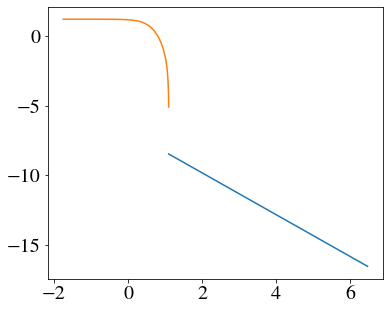

In [9]:
plt.plot(np.log10(r_stream),np.log10(rho_stream_scaled))
plt.plot(p.logR,p.logRho)
# Note that the surface of the star and the accretion stream do know match. There is a shock in between, which is basically at the stellar surface

## Concatenate arrays

In [10]:
r_star = 10**p.logR
rho_star = 10**p.logRho
T_star = 10**p.logT

In [11]:
r_star_stream = np.concatenate((r_star[::-1], r_stream))
rho_star_stream = np.concatenate((rho_star[::-1], rho_stream_scaled))
T_star_stream = np.concatenate((T_star[::-1],T_stream_scaled))

Text(0, 0.5, '$\\log_{10} \\rho$')

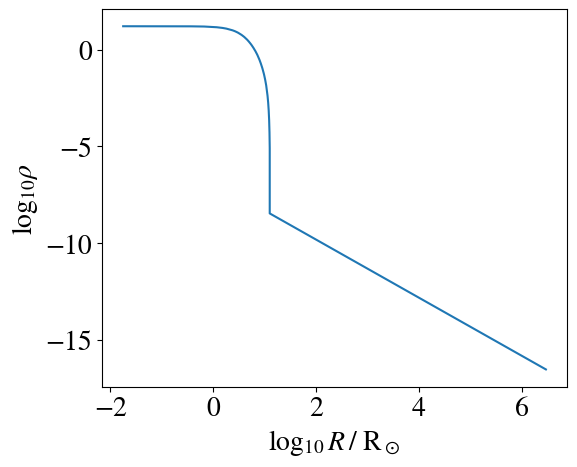

In [12]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
axis.plot(np.log10(r_star_stream),np.log10(rho_star_stream))
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10} \rho$")

7733.04719820857


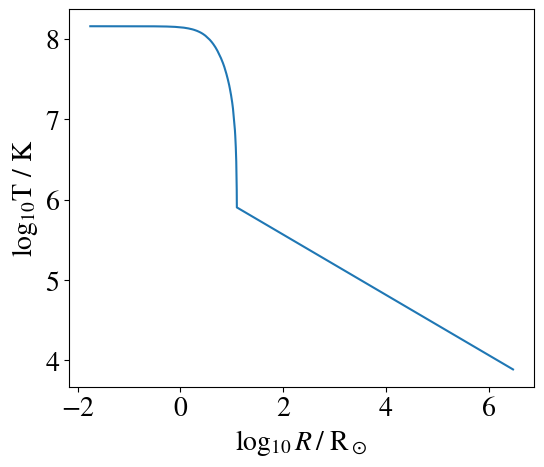

In [13]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(T_star_stream))
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10} $T / K")
print(T_stream_scaled[-1])

## Calculate sound speed 

In [14]:
gamma = 5.0/3.0
cs = (gamma*T_star_stream*c.kB/c.mp)**0.5

7733.04719820857


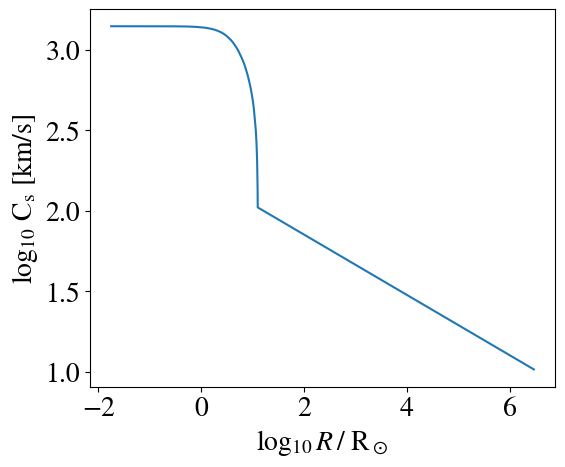

In [15]:
plt.rcParams['figure.figsize'] = (6,5)
fig, axis = plt.subplots(dpi=100)
axis.cla() # Clear Axis
#axis.plot(np.log10(r_stream),np.log10(T_stream_scaled))
axis.plot(np.log10(r_star_stream),np.log10(cs/1e5))
#axis.plot(p.logR,p.logT)
axis.set_xlabel("$\log_{10} \,R \,/ $ R$_\odot$")
axis.set_ylabel(r"$\log_{10}$ C$_{\rm s}$ [km/s]")
print(T_stream_scaled[-1])

## Orbit Integration

Collision event occurred at t = 0.8277982948607349 years.


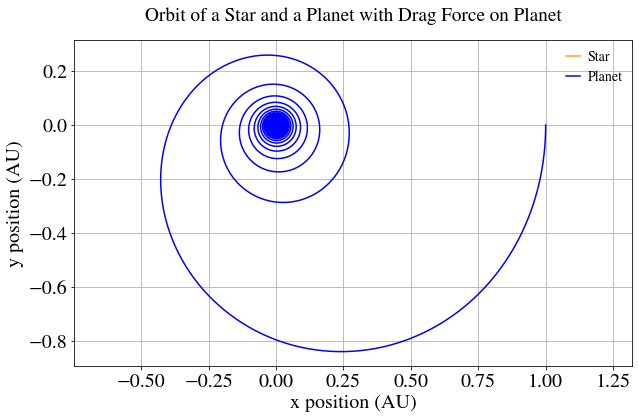

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
#G = 6.67430e-8  # Gravitational constant in CGS units
MSun = 1.989e33  # Mass of the sun in grams
au = 1.496e13    # 1 Astronomical Unit in cm

# Masses of the star and the planet
M_star = 1.0 * c.msun
M_planet = 0.001 * c.msun

# Initial positions and velocities
r_star_initial = np.array([0.0, 0.0])  # Star initial position
r_planet_initial = np.array([au, 0.0])  # Planet initial position
#v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
#v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


# Initial velocities - setting them so that the total momentum is zero
v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

v_star_initial=v_star_initial[::-1]
v_planet_initial=v_planet_initial[::-1]

#print(v_planet_initial_mag,v_star_initial[::-1],v_planet_initial[::-1])
# [Equations of Motion]


# Drag force parameters
C_d = 0.8   # Drag coefficient
rho = 5e-2  # Medium density in g/cm^3
r_planet = 6.371e8  # Radius of the planet in cm (e.g., Earth's radius)
A_planet = np.pi * r_planet**2  # Cross-sectional area in cm^2

# Equations of motion
def equations_of_motion(t, y):
    r_star, r_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
    r = r_planet - r_star  # Vector from star to planet
    distance = np.linalg.norm(r)
    force = c.G * M_star * M_planet / distance**2
    acc_star = force * r / (distance * M_star)
    acc_planet = -force * r / (distance * M_planet)

    # Calculate the drag force
    v_planet_mag = np.linalg.norm(v_planet)
    v_planet_hat = v_planet / v_planet_mag
    F_drag = -0.5 * C_d * rho * A_planet * v_planet_mag**2 * v_planet_hat
    acc_drag = F_drag / M_planet  # Acceleration due to drag

    # Add the drag acceleration to the planet's acceleration
    acc_planet += acc_drag

    return np.concatenate((v_star, v_planet, acc_star, acc_planet))

# Define an event function to stop integration when the planet reaches the star

def collision_event(t, y):
    r_star, r_planet = y[:2], y[2:4]
    distance = np.linalg.norm(r_planet - r_star)
    collision_distance = 1e11  # 1 km in cm
    return distance - collision_distance

# Set the event to be terminal

collision_event.terminal = True
collision_event.direction = -1  # Trigger only when the distance is decreasing



# Initial state
initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

# Time span for the integration (in seconds)
t_start = 0
t_end = 5*3.15e7  # One year
num_points = 10000
t_eval = np.linspace(t_start, t_end, num_points)

# Solve the equations of motion
solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)

# Extract the results
times = solution.t
positions = solution.y.T

if solution.status == 1:
    print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
else:
    print("No collision event occurred within the integration time span.")

# Plotting
plt.figure(figsize=(10, 6))
#plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
#plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.plot(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
plt.plot(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.xlabel('x position (AU)')
plt.ylabel('y position (AU)')
plt.legend()
plt.title('Orbit of a Star and a Planet with Drag Force on Planet')
plt.grid(True)
plt.axis('equal')
plt.show()


In [18]:
from scipy.interpolate import interp1d

# Assuming rho_star and radius_star are defined and sorted in increasing order
#rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', fill_value="extrapolate")
rho_star_function = interp1d(r_star_stream*c.rsun, rho_star_stream, kind='linear', assume_sorted=True, bounds_error=False, fill_value="extrapolate")


In [19]:
print(r_star_stream[-1],r_star[0])
current_rho = rho_star_function(r_star_stream[-1]*c.rsun)
print(current_rho)


2952065.1791086867 12.54426384954609
3e-17


 Starting Integration at r/rsun=  5.3615039910897675
524692258.3923614 [6784729.86878349       0.        ] [-5.24692258e+08  0.00000000e+00]
No collision event occurred within the integration time span.


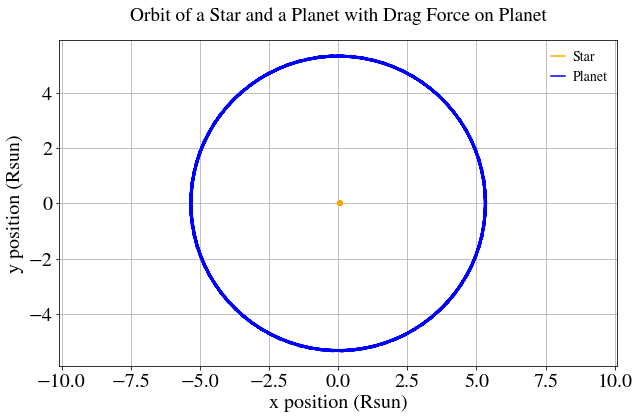

         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [22]:
%prun my_function()
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
#G = 6.67430e-8  # Gravitational constant in CGS units
MSun = 1.989e33  # Mass of the sun in grams
au = 1.496e13    # 1 Astronomical Unit in cm

start = r_star_stream[200]*c.rsun

# Masses of the star and the planet
M_star = M * c.msun
M_planet = 10 * c.msun
R_planet = 6.371e8  # Radius of the planet in cm (e.g., Earth's radius) 
R_star = r_star[0]*c.rsun

print('Starting Integration at r/rsun= ',start/c.rsun)

# Initial positions and velocities
r_star_initial = np.array([0.0, 0.0])  # Star initial position
r_planet_initial = np.array([start, 0.0])  # Planet initial position
#v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
#v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


# Initial velocities - setting them so that the total momentum is zero
v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

v_star_initial=v_star_initial[::-1]
v_planet_initial=v_planet_initial[::-1]

print(v_planet_initial_mag,v_star_initial[::-1],v_planet_initial[::-1])
# [Equations of Motion]


# Drag force parameters
C_d = 0.8   # Drag coefficient
rho = 5e-2  # Medium density in g/cm^3
A_planet = np.pi * R_planet**2  # Cross-sectional area in cm^2

# Equations of motion
def equations_of_motion(t, y):
    R_star, R_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
    R = R_planet - R_star  # Vector from star to planet
    distance = np.linalg.norm(R)
    force = c.G * M_star * M_planet / distance**2
    acc_star = force * R / (distance * M_star)
    acc_planet = -force * R / (distance * M_planet)
    
    
    # Find the interpolated density at the current distance
    current_rho = rho_star_function(distance)
    #print(distance/c.rsun,current_rho)

    
    # Calculate the drag force using the interpolated density 
    v_planet_mag = np.linalg.norm(v_planet)
    v_planet_hat = v_planet / v_planet_mag
    F_drag = -0.5 * C_d * current_rho * A_planet * v_planet_mag**2 * v_planet_hat
    acc_drag = F_drag / M_planet  # Acceleration due to drag

    # Add the drag acceleration to the planet's acceleration
    acc_planet += acc_drag

    return np.concatenate((v_star, v_planet, acc_star, acc_planet))

# Define an event function to stop integration when the planet reaches the star

def collision_event(t, y):
    r_star, r_planet = y[:2], y[2:4]
    distance = np.linalg.norm(R_planet - R_star)
    collision_distance = 1e11  # 1 km in cm
    return distance - collision_distance

# Set the event to be terminal

collision_event.terminal = True
collision_event.direction = -1  # Trigger only when the distance is decreasing


# Initial state
initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

# Time span for the integration (in seconds)
t_start = 0
t_end =  5*3.15e4  # One year
num_points = 1000
t_eval = np.linspace(t_start, t_end, num_points)

# Solve the equations of motion
#solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)
#solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='LSODA', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)
solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK23', t_eval=t_eval, atol=1e-6, rtol=1e-6, events=collision_event)

# 'RK23', 'DOP853'


# Extract the results
times = solution.t
positions = solution.y.T

if solution.status == 1:
    print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
else:
    print("No collision event occurred within the integration time span.")

# Plotting
plt.figure(figsize=(10, 6))
#plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
#plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
plt.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='Star', linestyle='-', color='orange')
plt.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Planet', linestyle='-',  color='blue')
plt.xlabel('x position (Rsun)')
plt.ylabel('y position (Rsun)')
plt.legend()
plt.title('Orbit of a Star and a Planet with Drag Force on Planet')
plt.grid(True)
plt.axis('equal')
plt.show()



In [122]:
def run_simulation():
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from scipy.integrate import solve_ivp

    # Constants
    #G = 6.67430e-8  # Gravitational constant in CGS units
    MSun = 1.989e33  # Mass of the sun in grams
    au = 1.496e13    # 1 Astronomical Unit in cm

   #start = r_star_stream[600]*c.rsun
    start = r_star_stream[550]*c.rsun

    # Masses of the star and the planet
    M_star = M * c.msun
    M_planet = 10 * c.msun
    R_planet = 6.371e8  # Radius of the planet in cm (e.g., Earth's radius) 
    R_star = r_star[0]*c.rsun

    print('Starting Integration at r/rsun= ',start/c.rsun)

    # Initial positions and velocities
    r_star_initial = np.array([0.0, 0.0])  # Star initial position
    r_planet_initial = np.array([start, 0.0])  # Planet initial position
    #v_star_initial = np.array([0.0, np.sqrt(G * M_planet / np.linalg.norm(r_planet_initial))])   # Star initial velocity
    #v_planet_initial = np.array([0.0, -np.sqrt(G * M_star / np.linalg.norm(r_planet_initial))])  # Planet initial velocity


    # Initial velocities - setting them so that the total momentum is zero
    v_planet_initial_mag = np.sqrt(c.G * M_star / np.linalg.norm(r_planet_initial - r_star_initial))
    v_star_initial = M_planet / M_star * v_planet_initial_mag * (r_planet_initial - r_star_initial) / np.linalg.norm(r_planet_initial - r_star_initial)
    v_planet_initial = v_planet_initial_mag * (r_star_initial - r_planet_initial) / np.linalg.norm(r_star_initial - r_planet_initial)

    v_star_initial=v_star_initial[::-1]
    v_planet_initial=v_planet_initial[::-1]

    print(v_planet_initial_mag,v_star_initial[::-1],v_planet_initial[::-1])
    # [Equations of Motion]


    # Drag force parameters
    C_d = 1000000 #0.8   # Drag coefficient
    rho = 5e-2  # Medium density in g/cm^3
    A_planet = np.pi * R_planet**2  # Cross-sectional area in cm^2

    # Equations of motion
    def equations_of_motion(t, y):
        R_star, R_planet, v_star, v_planet = y[:2], y[2:4], y[4:6], y[6:]
        R = R_planet - R_star  # Vector from star to planet
        distance = np.linalg.norm(R)
        force = c.G * M_star * M_planet / distance**2
        acc_star = force * R / (distance * M_star)
        acc_planet = -force * R / (distance * M_planet)


        # Find the interpolated density at the current distance
        current_rho = rho_star_function(distance)
        #print(distance/c.rsun,current_rho)


        # Calculate the drag force using the interpolated density 
        v_planet_mag = np.linalg.norm(v_planet)
        v_planet_hat = v_planet / v_planet_mag
        F_drag = -0.5 * C_d * current_rho * A_planet * v_planet_mag**2 * v_planet_hat
        acc_drag = F_drag / M_planet  # Acceleration due to drag

        # Add the drag acceleration to the planet's acceleration
        acc_planet += acc_drag

        return np.concatenate((v_star, v_planet, acc_star, acc_planet))

    # Define an event function to stop integration when the planet reaches the star

    def collision_event(t, y):
        r_star, r_planet = y[:2], y[2:4]
        distance = np.linalg.norm(R_planet - R_star)
        collision_distance = 1e10  # 10 km in cm
        return distance - collision_distance

    # Set the event to be terminal

    collision_event.terminal = True
    collision_event.direction = -1  # Trigger only when the distance is decreasing


    # Initial state
    initial_state = np.concatenate((r_star_initial, r_planet_initial, v_star_initial, v_planet_initial))

    # Time span for the integration (in seconds)
    t_start = 0
    t_end =  5*3.15e4  # One year
    num_points = 10000
    t_eval = np.linspace(t_start, t_end, num_points)

    # Solve the equations of motion
    solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK45', t_eval=t_eval, atol=1e-10, rtol=1e-10, events=collision_event)
    #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='LSODA', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)
    #solution = solve_ivp(equations_of_motion, [t_start, t_end], initial_state, method='RK23', t_eval=t_eval, atol=1e-8, rtol=1e-8, events=collision_event)

    # 'RK23', 'DOP853'


    # Extract the results
    times = solution.t
    positions = solution.y.T

    if solution.status == 1:
        print(f"Collision event occurred at t = {solution.t_events[0][0]/3.15e7} years.")
    else:
        print("No collision event occurred within the integration time span.")

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    #plt.scatter(positions[:, 0] / au, positions[:, 1] / au, label='Star', linestyle='-', color='orange')
    #plt.scatter(positions[:, 2] / au, positions[:, 3] / au, label='Planet', linestyle='-',  color='blue')
    ax.plot(positions[:, 0] / c.rsun, positions[:, 1] / c.rsun, label='AGN Star Center' , linestyle='-', color='orange')
    ax.plot(positions[:, 2] / c.rsun, positions[:, 3] / c.rsun, label='Secondary Object' , linestyle='-',  color='blue')
    
    # Plotting Bondi radius and star locations as circles
    # Create a dashed circle: specify its center, radius, and linestyle
    circle = patches.Circle((0.0, 0.0), R_star/c.rsun, edgecolor='black', facecolor='none', linestyle='--')
    # Add the circle to the axes
    ax.add_patch(circle)
    
    
    ax.set_xlabel('x position (Rsun)')
    ax.set_ylabel('y position (Rsun)')
    ax.legend()
    #ax.title('Orbit of a Star and a Planet with Drag Force on Planet')
    ax.grid(True)
    ax.axis('equal')
    #ax.show()


Starting Integration at r/rsun=  12.283776666440625
346642666.9051854 [4482392.90427582       0.        ] [-3.46642667e+08  0.00000000e+00]
No collision event occurred within the integration time span.
 

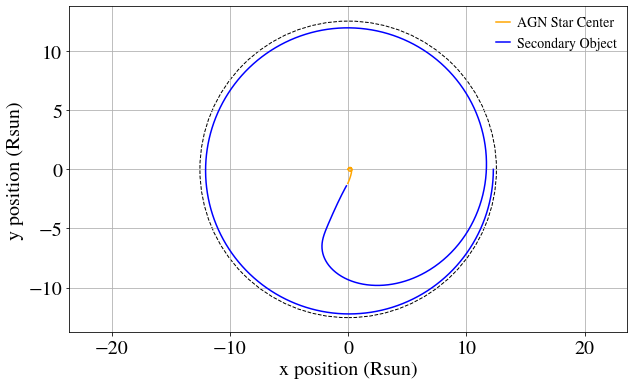

         3256605 function calls (3181076 primitive calls) in 1.917 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    32990    0.326    0.000    1.504    0.000 <ipython-input-122-a2e418bc30c4>:48(equations_of_motion)
    32990    0.186    0.000    0.613    0.000 interpolate.py:601(_call_linear)
329474/254562    0.172    0.000    0.549    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    74859    0.135    0.000    0.283    0.000 linalg.py:2362(norm)
     5498    0.105    0.000    1.703    0.000 rk.py:14(rk_step)
    65980    0.089    0.000    0.209    0.000 _methods.py:90(_clip_dep_is_scalar_nan)
   249987    0.086    0.000    0.086    0.000 {built-in method numpy.array}
    32990    0.064    0.000    0.064    0.000 _methods.py:105(_clip_dep_invoke_with_casting)
    32990    0.048    0.000    0.127    0.000 _util.py:216(_asarray_validated)
   247493    0.039    0.000    0.124    0.000 _asarra

In [123]:
%prun run_simulation()
# Problem when the object gets too close. Debug!

In [ ]:
# Add dashed circles at r=r_shock and r=r_bondi 